<a href="https://colab.research.google.com/github/ThiagoLozano/Alura_Imersao-de-Dados-2-Edicao/blob/main/Aula002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Importa a Biblioteca Pandas e Matplotlib.
import pandas as pd
import matplotlib.pyplot as plt

# Pega a fonte dos dados.
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

# Cria o objeto 'dados'.
dados = pd.read_csv(fonte)

In [3]:
# Retorna o nome das colunas.
for c in dados.columns:
  print(c, end=' | ')

NU_INSCRICAO | NU_ANO | CO_MUNICIPIO_RESIDENCIA | NO_MUNICIPIO_RESIDENCIA | CO_UF_RESIDENCIA | SG_UF_RESIDENCIA | NU_IDADE | TP_SEXO | TP_ESTADO_CIVIL | TP_COR_RACA | TP_NACIONALIDADE | CO_MUNICIPIO_NASCIMENTO | NO_MUNICIPIO_NASCIMENTO | CO_UF_NASCIMENTO | SG_UF_NASCIMENTO | TP_ST_CONCLUSAO | TP_ANO_CONCLUIU | TP_ESCOLA | TP_ENSINO | IN_TREINEIRO | CO_ESCOLA | CO_MUNICIPIO_ESC | NO_MUNICIPIO_ESC | CO_UF_ESC | SG_UF_ESC | TP_DEPENDENCIA_ADM_ESC | TP_LOCALIZACAO_ESC | TP_SIT_FUNC_ESC | IN_BAIXA_VISAO | IN_CEGUEIRA | IN_SURDEZ | IN_DEFICIENCIA_AUDITIVA | IN_SURDO_CEGUEIRA | IN_DEFICIENCIA_FISICA | IN_DEFICIENCIA_MENTAL | IN_DEFICIT_ATENCAO | IN_DISLEXIA | IN_DISCALCULIA | IN_AUTISMO | IN_VISAO_MONOCULAR | IN_OUTRA_DEF | IN_GESTANTE | IN_LACTANTE | IN_IDOSO | IN_ESTUDA_CLASSE_HOSPITALAR | IN_SEM_RECURSO | IN_BRAILLE | IN_AMPLIADA_24 | IN_AMPLIADA_18 | IN_LEDOR | IN_ACESSO | IN_TRANSCRICAO | IN_LIBRAS | IN_TEMPO_ADICIONAL | IN_LEITURA_LABIAL | IN_MESA_CADEIRA_RODAS | IN_MESA_CADEIRA_SEPARAD

In [9]:
# Retorna os inscritos menores ou iguais a 14 anos e sua residência.
dados.query("NU_IDADE <= 14")['SG_UF_RESIDENCIA'].value_counts()

PE    18
CE    15
BA    14
PA    12
MG    11
SP    11
MA     9
PI     7
GO     7
PB     7
DF     4
AM     4
MT     4
SE     3
PR     3
TO     3
RO     2
SC     2
AL     2
AP     1
RJ     1
ES     1
MS     1
RS     1
AC     1
RN     1
Name: SG_UF_RESIDENCIA, dtype: int64

In [12]:
# Retorna a proporção da quantidade de inscritos por estado residencial.
dados.query("NU_IDADE <= 14")['SG_UF_RESIDENCIA'].value_counts(normalize=True)

PE    0.124138
CE    0.103448
BA    0.096552
PA    0.082759
MG    0.075862
SP    0.075862
MA    0.062069
PI    0.048276
GO    0.048276
PB    0.048276
DF    0.027586
AM    0.027586
MT    0.027586
SE    0.020690
PR    0.020690
TO    0.020690
RO    0.013793
SC    0.013793
AL    0.013793
AP    0.006897
RJ    0.006897
ES    0.006897
MS    0.006897
RS    0.006897
AC    0.006897
RN    0.006897
Name: SG_UF_RESIDENCIA, dtype: float64

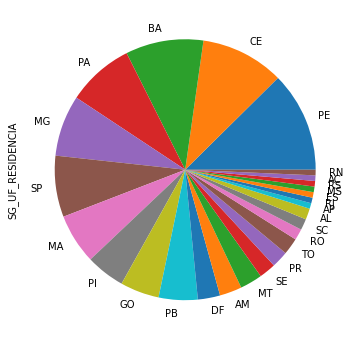

In [29]:
# Retorna um gráfico de pizza para a proporção de inscritos por estado residente.
alunos_menor_quatorze = dados.query("NU_IDADE <= 14")
alunos_menor_quatorze['SG_UF_RESIDENCIA'].value_counts().plot.pie(figsize=(10,6))

Text(0, 0.5, 'Percetagem')

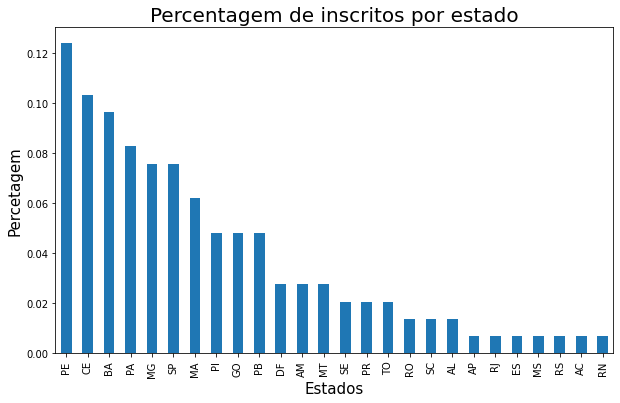

In [38]:
# Retorna um gráfico de barra para a proporção de inscritos por estado residente.
alunos_menor_quatorze['SG_UF_RESIDENCIA'].value_counts(normalize=True).plot.bar(figsize=(10,6))
plt.title('Percentagem de inscritos por estado',fontdict={'fontsize':20})                         # Título do gráfico.
plt.xlabel('Estados', fontdict={'fontsize':15})                                                   # Título da coordenada X.
plt.ylabel('Percetagem', fontdict={'fontsize':15})                                                # Título da coordenada Y.

In [32]:
# Importa a Biblioteca Seaborn.
import seaborn as sns

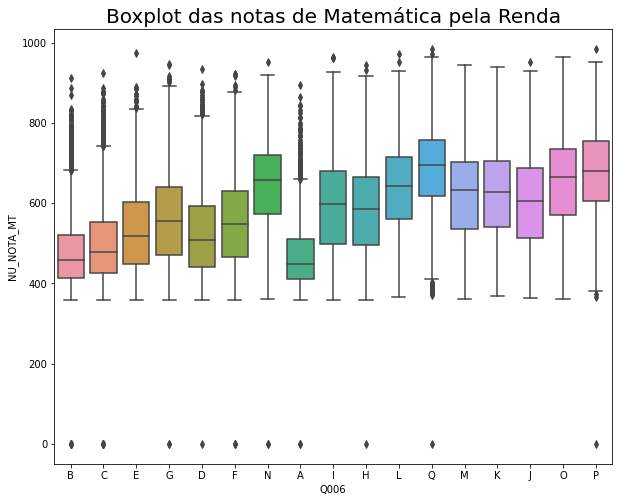

In [40]:
# Retorna um BloxPlot das notas de matemática pela renda.
plt.figure(figsize=(10,8))                                                            # Configura o tamanho do gráfico pelo Matplotlib.
plt.title('Boxplot das notas de Matemática pela Renda', fontdict={'fontsize':20})     # Título do gráfico.
sns.boxplot(x='Q006', y='NU_NOTA_MT', data = dados)                                   # Cria o gráfico pelo Seaborn.

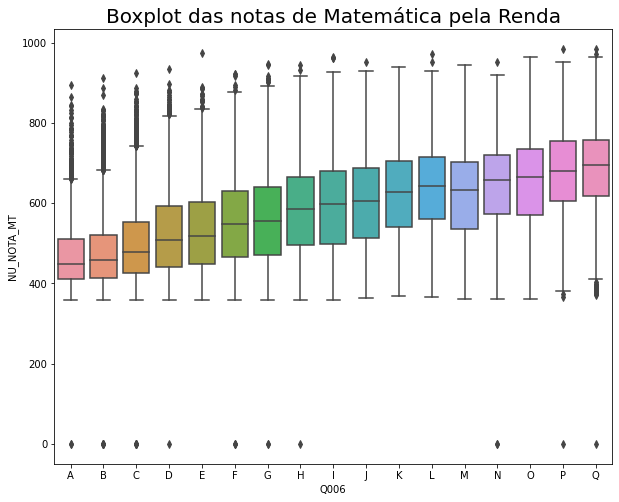

In [47]:
# Cria uma ordem para a apresentação o eixo X.
renda_ordenada = dados['Q006'].unique()
renda_ordenada.sort()

# Retorna um BloxPlot das notas de matemática pela renda de forma ordenada.
plt.figure(figsize=(10,8))                                                            # Configura o tamanho do gráfico pelo Matplotlib.
plt.title('Boxplot das notas de Matemática pela Renda', fontdict={'fontsize':20})     # Título do gráfico.
sns.boxplot(x='Q006', y='NU_NOTA_MT', data = dados, order = renda_ordenada)           # Cria o gráfico pelo Seaborn.

In [70]:
# Cria uma lista com todas as colunas de provas.
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

In [71]:
# Faz a soma pela linha (axis 1 = Linhas, axis 2 = Colunas)
dados[provas].sum(axis=1)

0         2288.9
1         1184.6
2         2350.5
3         2555.7
4         2803.5
           ...  
127375    2867.4
127376    2218.5
127377    1453.9
127378    2573.9
127379    2287.8
Length: 127380, dtype: float64

In [72]:
# Cria uma coluna no DataFrame.
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


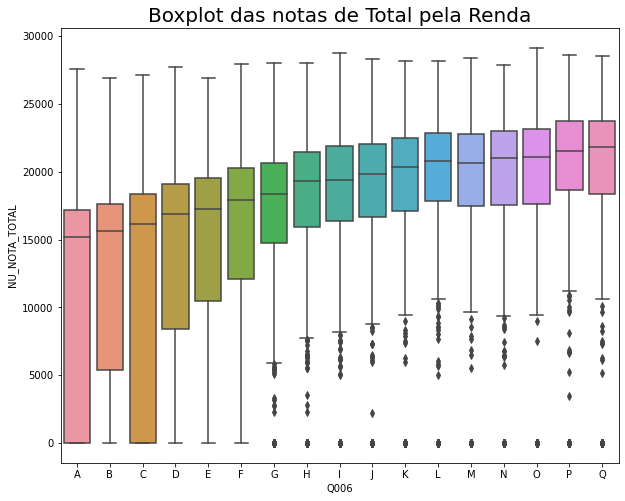

In [68]:
# Retorna um BloxPlot das notas de matemática pela renda de forma ordenada.
plt.figure(figsize=(10,8))                                                            # Configura o tamanho do gráfico pelo Matplotlib.
plt.title('Boxplot das notas de Total pela Renda', fontdict={'fontsize':20})          # Título do gráfico.
sns.boxplot(x='Q006', y='NU_NOTA_TOTAL', data = dados, order = renda_ordenada)        # Cria o gráfico pelo Seaborn.

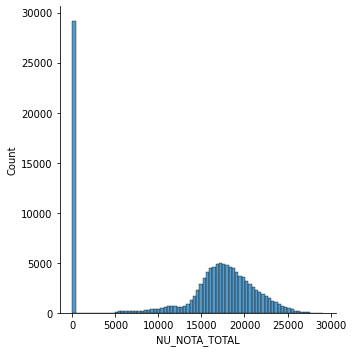

In [69]:
# Retorna um histograma.
sns.displot(dados, x='NU_NOTA_TOTAL')

In [82]:
# Retorna os alunos que tiraram 0.
provas.append('NU_NOTA_TOTAL')
dados.query("NU_NOTA_TOTAL == 0")[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


In [86]:
# Retorna alunos que não tem o total de notas igual a 0.
dados_sem_nota_zero = dados.query('NU_NOTA_TOTAL != 0')
dados_sem_nota_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


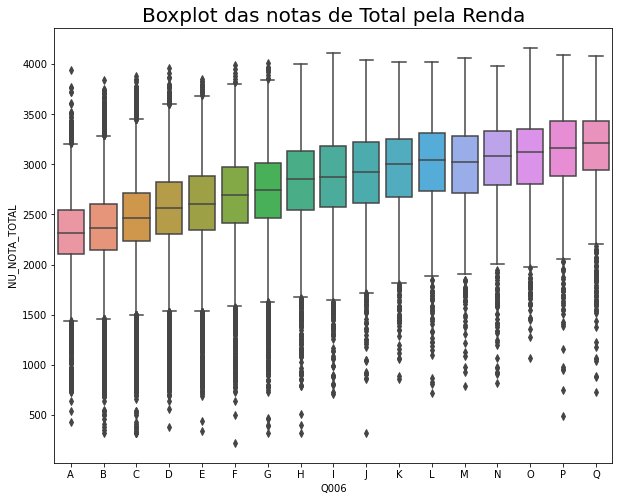

In [87]:
# Retorna o Boxplot
# Retorna um BloxPlot das notas de matemática pela renda de forma ordenada.
plt.figure(figsize=(10,8))                                                                    # Configura o tamanho do gráfico.
plt.title('Boxplot das notas de Total pela Renda', fontdict={'fontsize':20})                  # Título do gráfico.
sns.boxplot(x='Q006', y='NU_NOTA_TOTAL', data = dados_sem_nota_zero, order = renda_ordenada)  # Cria o gráfico pelo Seaborn.

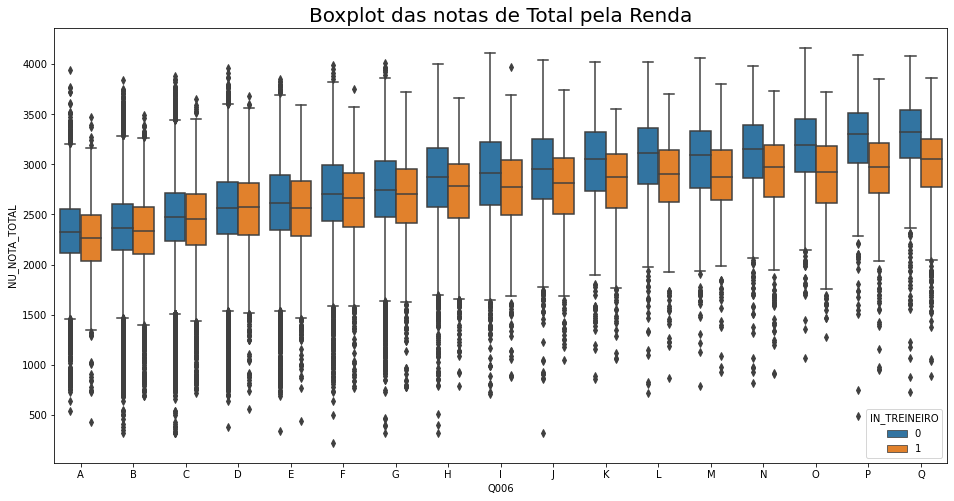

In [89]:
# Retorna os dados de treineiros e não treineiros.
# Retorna um BloxPlot das notas de matemática pela renda de forma ordenada.
plt.figure(figsize=(16,8))                                                                                        # Configura o tamanho do gráfico.
plt.title('Boxplot das notas de Total pela Renda', fontdict={'fontsize':20})                                      # Título do gráfico.
sns.boxplot(x='Q006', y='NU_NOTA_TOTAL', data = dados_sem_nota_zero, hue='IN_TREINEIRO', order = renda_ordenada)  # Cria o gráfico

Mega Desafio: Pegar a mostra completa dos alunos de 13 e 14 anos.

Desafio002: Aumentar a amostra para alunos menor de idade e comparar a proporção dos estados.

Desafio003: Criar uma função par plotaro boxplot no seaborn.

Desafio004: Verificar se quem zerou a prova foi eliminado ou não estava presente.

Desafio005: Quem quem é eliminado da prova tira zero ou retorna NaN.

Deasfio006: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

Desafio007: fazer o mesmo bloxplot para a questão 25.